## Libraries

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict, LeaveOneOut, train_test_split
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, 
from sklearn.naive_bayes import GaussianNB

In [330]:
# Reading of data set
df = pd.read_csv("hotel_booking.csv")

# Visualization of the first 5 rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [331]:
df.shape

(119390, 36)

## **Exploratory Data Analysis** (EDA)

To obtain more information from the dataset we'll need to perform various exploratory data analysis techniques, such as:
1. Descriptive Statistics
2. Univariate Analysis
3. Bivariate Analysis

### 1. Descriptive Statistics

In [332]:
# Some statistical information about numerical variables

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [333]:
# Check for duplicated rows

duplicated_rows = df[df.duplicated()]

duplicated_rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card


There are **no** duplicated rows, so we don't need to do anything here.

In [334]:
# Dataframe with information about variable data types, missing values and unique values

data_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique()
})

data_info

,Data Type,Missing Values,Unique Values
hotel,object,0,2
is_canceled,int64,0,2
lead_time,int64,0,479
arrival_date_year,int64,0,3
arrival_date_month,object,0,12
arrival_date_week_number,int64,0,53
arrival_date_day_of_month,int64,0,31
stays_in_weekend_nights,int64,0,17
stays_in_week_nights,int64,0,35
adults,int64,0,14


**Notes:**

This dataframe informs us that there are **20 numerical variables** and **16 categorical variables**.

In total, there are **129425** missing values, where **112593** are from `company` variable, **16340** from `agent` variable, **488** from `country` variable, and **4** from `children` variable.

Let's deal with these missing values:
- **Company**: the missing values for this variable represent 94% of the total cases, so we just drop the column;
- **Country**: for the `country` variable we fill the missing values with the mode;
- **Children**: for the `children` variable we fill the missing values with the median, then proceed to check if there is any row where there are children but no adults and drop them;
- **Agent**: and for the `agent` variable we just drop the rows where missing values are present.

In [335]:
# Dropping the column 'company'

df.drop(columns=['company'], inplace=True)

In [336]:
# Fill missing values with mode

df['country'] = df['country'].fillna(df['country'].mode()[0])

In [337]:
# Fill missing values with mean

df['children'] = df['children'].fillna(df['children'].median())

In [338]:
# Drop rows where the number of children is greater than 0 and the number of adults is equal to 0

df.drop(df[(df['children'] > 0) & (df['adults'] == 0)].index, inplace=True)

In [339]:
# Dropping the missing values for Agent 

df = df.dropna()

In [340]:
mv = df.isna().sum().sum()

print(f"There are {mv} missing values.")

There are 0 missing values.


### 2. Univariate and Bivariate Analysis

Now that our dataset is clean, we can start by analysing the correlation between features to better understand the data and to answer some questions.

For example:
1. *Are there specific times of the year when cancellations are more frequent?*
2. *Do clients with higher lead times tend to cancel more often?*
3. *How do cancellation rates differ between first-time guests and repeat guests?*
4. *Does the assigned room type influence whether a booking is canceled?*
5. *What is the variation in the price per night during the year?*
6. *Is there a correlation between higher room prices and increased cancellation rates?*

In [341]:
# Custom order for the months
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

monthly_guests = pd.DataFrame(df['arrival_date_month'].value_counts().reindex(month_order))
monthly_guests.columns = ['guests']
monthly_guests

,guests
arrival_date_month,
January,4548
February,6444
March,8133
April,9737
May,10073
June,9795
July,11574
August,12655
September,9426


C:\Users\João Alves\AppData\Local\Temp\ipykernel_30712\3333651869.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(['First-Time', 'Repeat'])


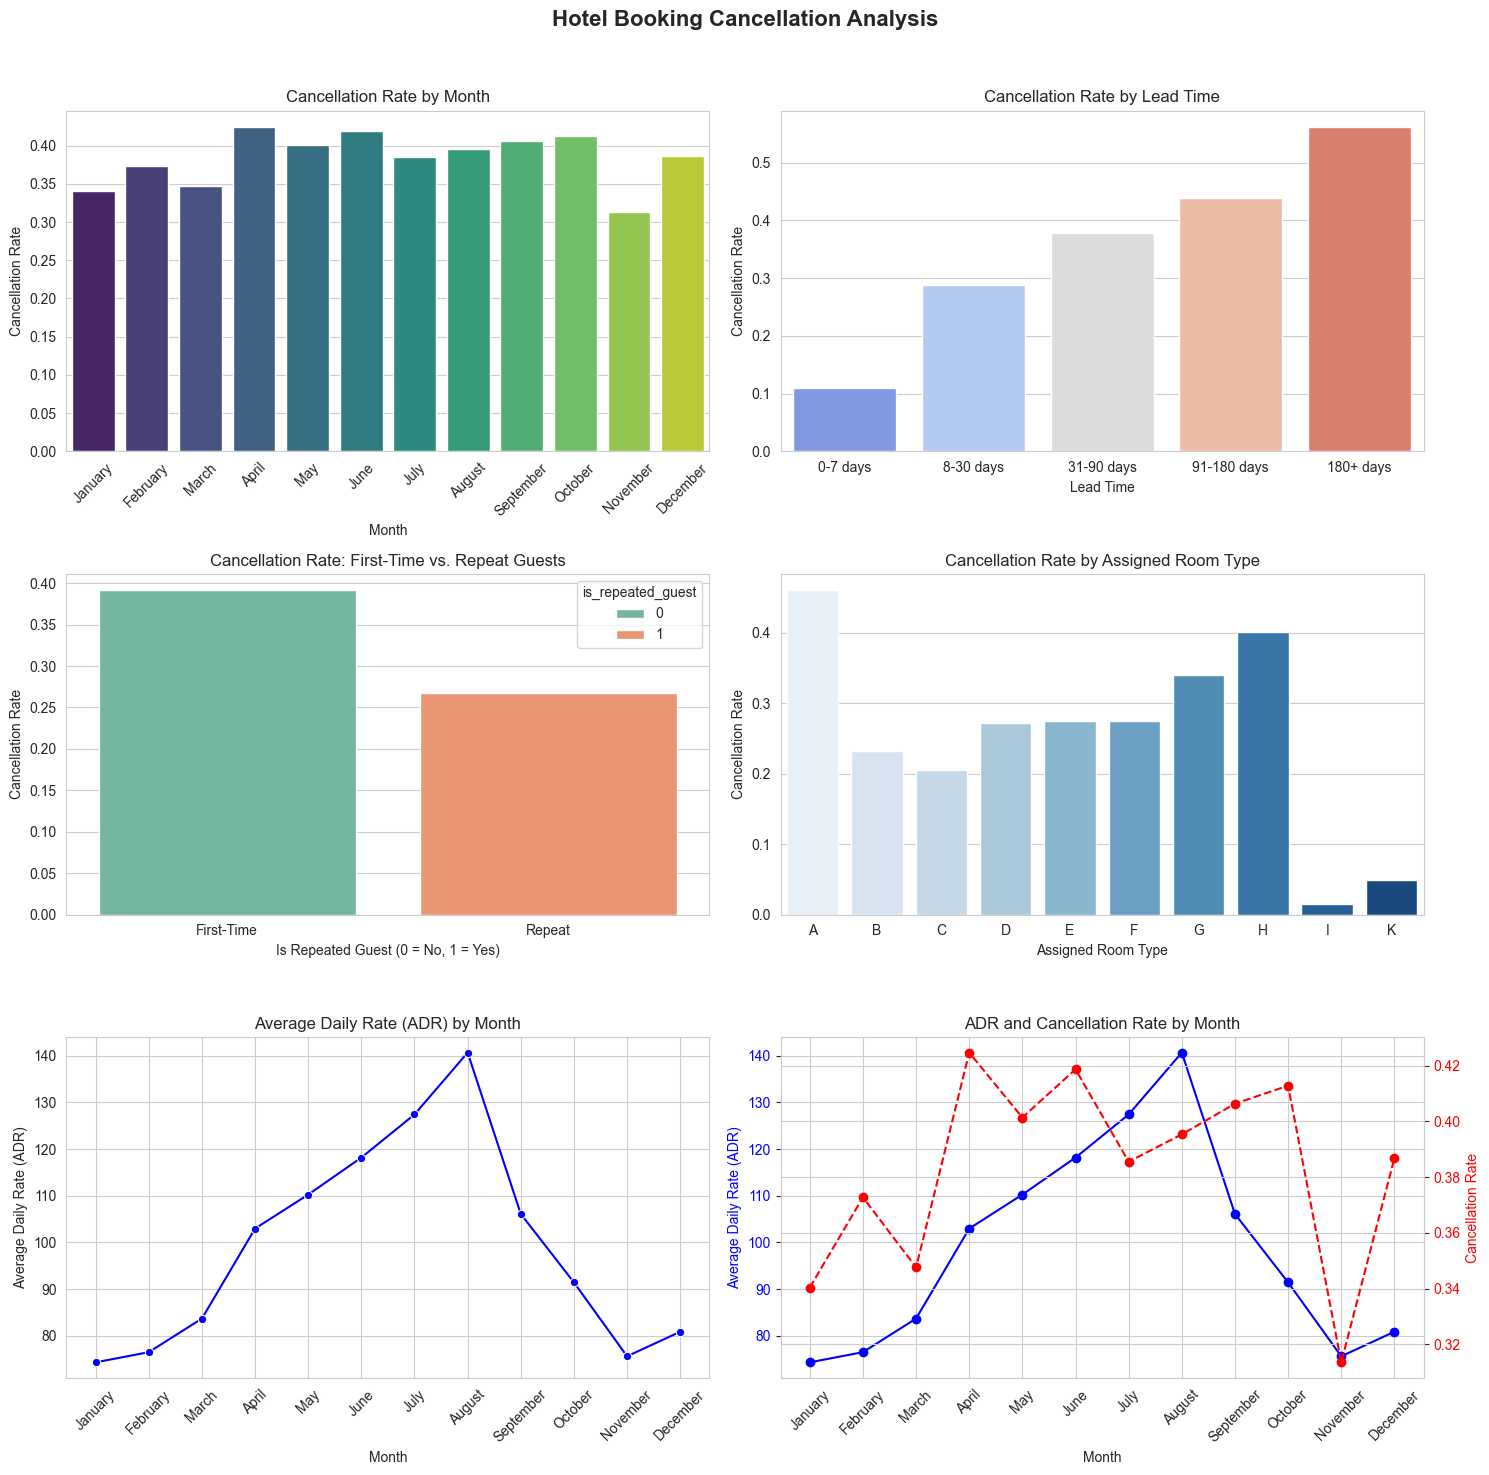

In [342]:
sns.set_style('whitegrid')

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("Hotel Booking Cancellation Analysis", fontsize=16, fontweight='bold')

# 1. Are there specific times of the year when cancellations are more frequent?
monthly_cancellations = df.groupby('arrival_date_month')['is_canceled'].mean().reindex(month_order)
sns.barplot(x=monthly_cancellations.index, y=monthly_cancellations.values, ax=axes[0, 0], palette="viridis", hue=monthly_cancellations.index)
axes[0, 0].set_title("Cancellation Rate by Month")
axes[0, 0].set_xlabel("Month")
axes[0, 0].set_ylabel("Cancellation Rate")
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Do clients with higher lead times tend to cancel more often?
df['lead_time_bins'] = pd.cut(df['lead_time'], bins=[0, 7, 30, 90, 180, 365], labels=["0-7 days", "8-30 days", "31-90 days", "91-180 days", "180+ days"])
lead_time_cancellations = df.groupby('lead_time_bins', observed=True)['is_canceled'].mean()
sns.barplot(x=lead_time_cancellations.index, y=lead_time_cancellations.values, ax=axes[0, 1], palette="coolwarm", hue=lead_time_cancellations.index)
axes[0, 1].set_title("Cancellation Rate by Lead Time")
axes[0, 1].set_xlabel("Lead Time")
axes[0, 1].set_ylabel("Cancellation Rate")

# 3. How do cancellation rates differ between first-time guests and repeat guests?
repeat_guest_cancellations = df.groupby('is_repeated_guest')['is_canceled'].mean()
sns.barplot(x=repeat_guest_cancellations.index, y=repeat_guest_cancellations.values, ax=axes[1, 0], palette="Set2", hue=repeat_guest_cancellations.index)
axes[1, 0].set_title("Cancellation Rate: First-Time vs. Repeat Guests")
axes[1, 0].set_xlabel("Is Repeated Guest (0 = No, 1 = Yes)")
axes[1, 0].set_ylabel("Cancellation Rate")
axes[1, 0].set_xticklabels(['First-Time', 'Repeat'])

# 4. Does the assigned room type influence whether a booking is canceled?
room_type_cancellations = df.groupby('assigned_room_type')['is_canceled'].mean()
sns.barplot(x=room_type_cancellations.index, y=room_type_cancellations.values, ax=axes[1, 1], palette="Blues", hue=room_type_cancellations.index)
axes[1, 1].set_title("Cancellation Rate by Assigned Room Type")
axes[1, 1].set_xlabel("Assigned Room Type")
axes[1, 1].set_ylabel("Cancellation Rate")

# 5. What is the variation in the price per night during the year?
adr_by_month = df.groupby('arrival_date_month')['adr'].mean().reindex(month_order)
sns.lineplot(x=adr_by_month.index, y=adr_by_month.values, marker="o", ax=axes[2, 0], color="b")
axes[2, 0].set_title("Average Daily Rate (ADR) by Month")
axes[2, 0].set_xlabel("Month")
axes[2, 0].set_ylabel("Average Daily Rate (ADR)")
axes[2, 0].tick_params(axis='x', rotation=45)


# 6. Is there a correlation between higher room prices and increased cancellation rates?
ax1 = axes[2, 1]
ax1.set_title("ADR and Cancellation Rate by Month")
ax1.set_xlabel("Month")
ax1.set_ylabel("Average Daily Rate (ADR)", color="blue")
ax1.plot(adr_by_month.index, adr_by_month.values, marker="o", color="blue", label="ADR")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.tick_params(axis='x', rotation=45)
ax1.grid(visible=True)

ax2 = ax1.twinx()  # instantiate a second y-axis sharing the same x-axis
ax2.set_ylabel("Cancellation Rate", color="red")
ax2.plot(monthly_cancellations.index, monthly_cancellations.values, marker="o", color="red", linestyle="--", label="Cancellation Rate")
ax2.tick_params(axis="y", labelcolor="red")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Notes:**

1. ***Are there specific times of the year when cancellations are more frequent?** (Cancellation Rate by Month)*

    This bar plot shows that cancellation rates vary by month, with peaks in certain months like April, June, and October.



2. ***Do clients with higher lead times tend to cancel more often?** (Cancellation Rate by Lead Time)*

    The plot shows that the cancellation rate tends to increase with longer lead times. Bookings made 180+ days in advance have the highest cancellation rates, while those made within a week have the lowest. This indicates that clients booking far in advance are more likely to cancel, possibly due to changes in plans over time.



3. ***How do cancellation rates differ between first-time guests and repeat guests?** (Cancellation Rate: First-Time vs Repeated Guest)*

    First-time guests have a higher cancellation rate than repeat guests. This suggests that repeat guests may be more committed to their bookings, possibly due to familiarity with the hotel.



4. ***Does the assigned room type influence whether a booking is canceled?** (Cancellation Rate by Assigned Room Type)*

    Certain room types (e.g., "A" and "H") show higher cancellation rates compared to others. This could be due to various factors.



5. ***What is the variation in the price per night during the year?** (ADR by Month)*

    This line plot shows that ADR fluctuates by month, with peaks during summer (July and August) and a slight increase again in December. This trend aligns with typical peak travel periods. Higher rates in these months reflect demand-based pricing, where rates increase as demand rises.



6. ***Is there a correlation between higher room prices and increased cancellation rates?** (ADR and Cancellation Rate by Month)*

    By correlating the number of guests with ADR and cancellation rates, we can see if months with high guest numbers also coincide with high ADR and cancellation rates. For example, August has the highest number of guests and also shows high ADR and cancellation rates. This indicates strong demand, allowing for premium pricing, but it may also lead to more cancellations as guests react to price sensitivity.

## **Feature Selection**

In this step we are going to do a feature selection and reduction so the models performance improves. We start by creating a correlation matrix to analyze the correlation between features, and then apply filter methods of feature selection: **ANOVA** for continuous attributes vs categorical target variable and **Chi-Square** for categorical attributes and categorical target variable.

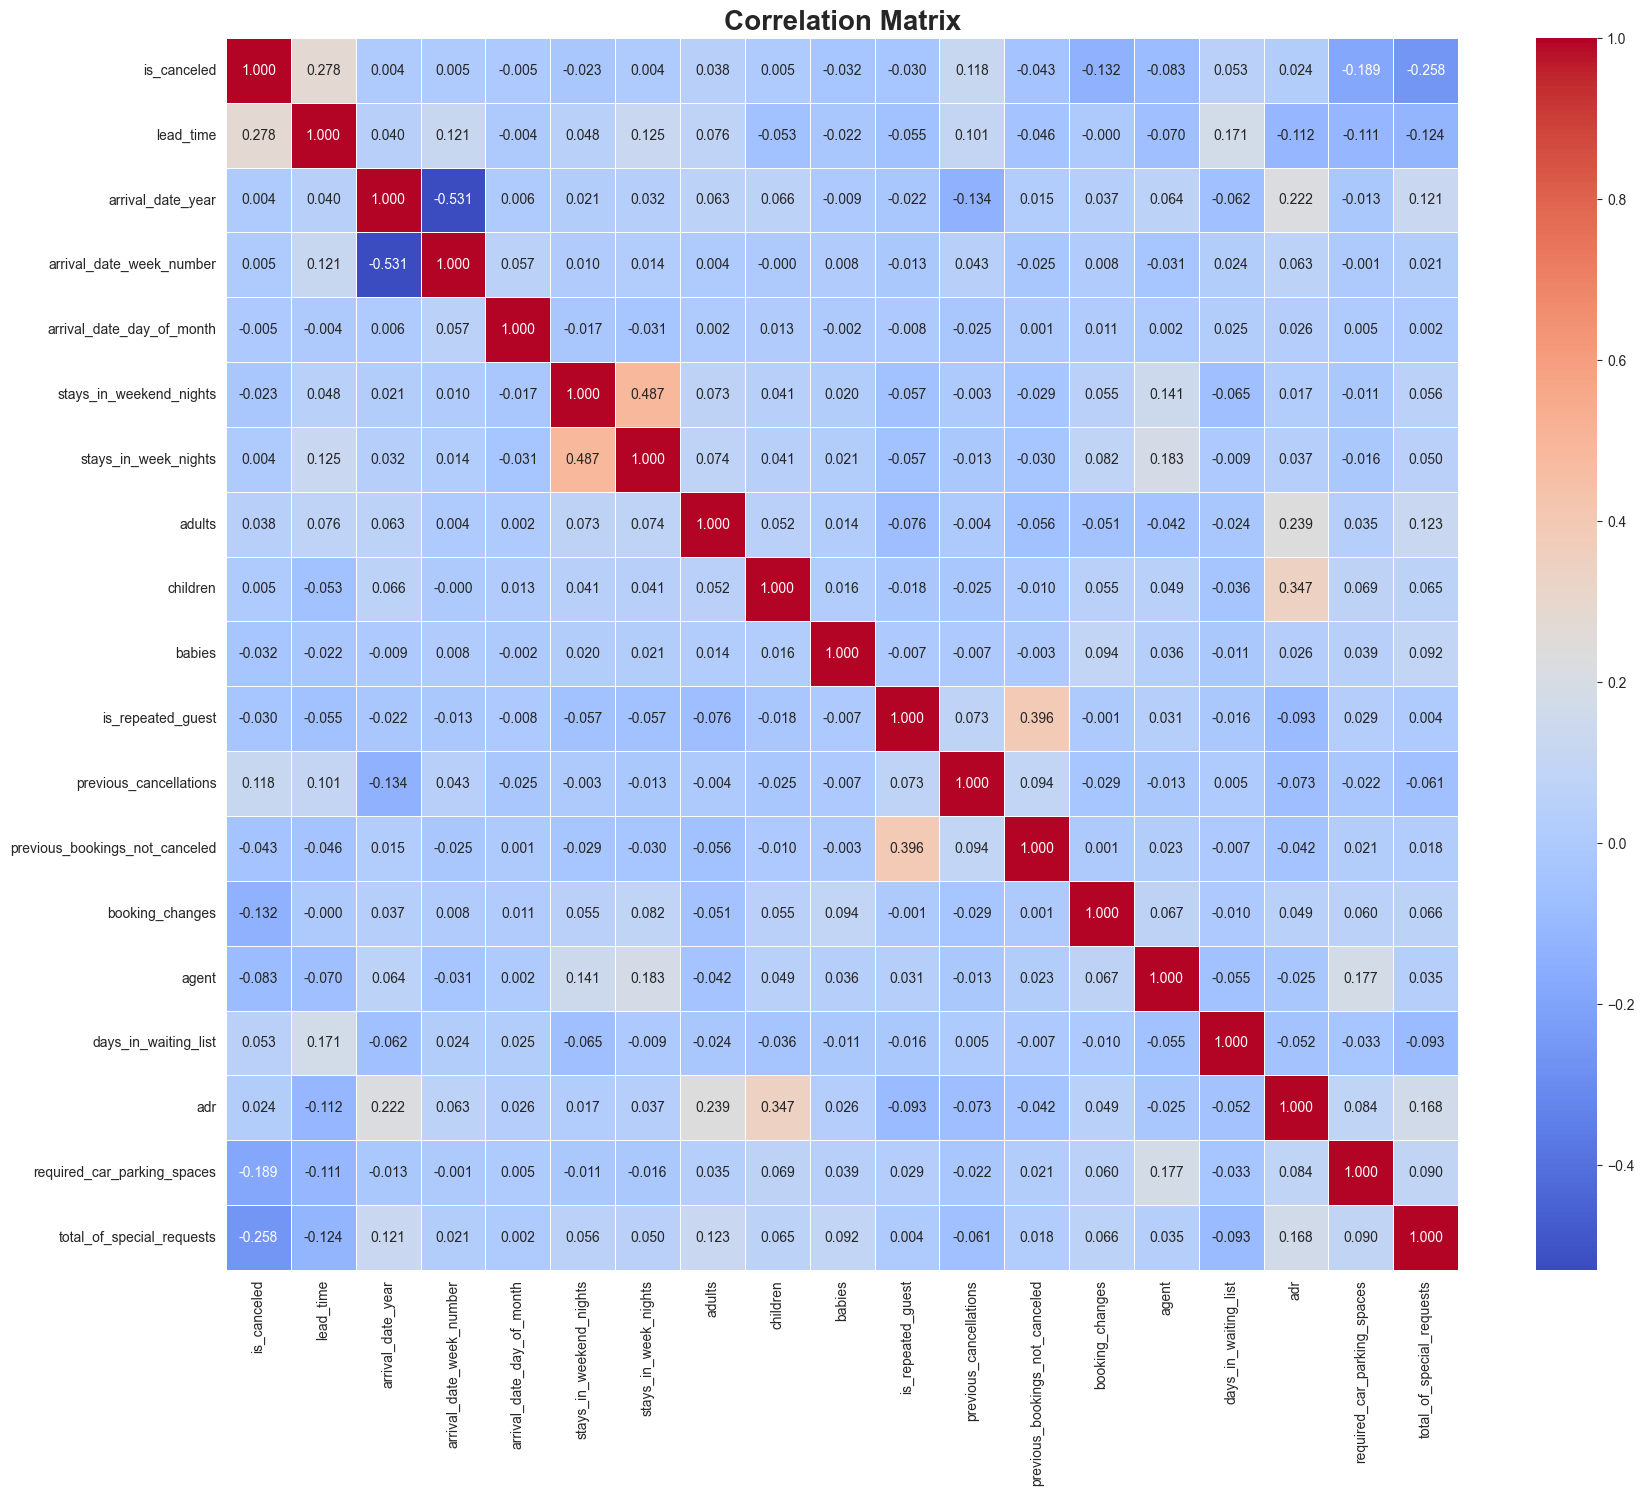

In [343]:
plt.figure(figsize=(20,16))

corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, square=True, linewidths=0.5, fmt=".3f", cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=20, fontweight='bold')
plt.show()

In [344]:
original_df = df.copy()

#### 1. ANOVA Method

Assumption(H0): There is NO relation between the given variables.

Explanation:
1. We create a list only with the continous variables of the original dataset
2. The function `FunctionAnova` is called and applied
3. The correlation results are shown and if the variable is correlated or not
4. We drop the columns that are useless or not correlated with the target variable

If the ANOVA P-Value is <0.05, that means we reject H0.

In [345]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    results = []

    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            Correlated = 'Yes'
        else:
            Correlated = 'No'
        results.append({'Variable': predictor, 'P-value': AnovaResults[1], 'Correlated': Correlated})
    
    results_df = pd.DataFrame(results)
    
    return results_df

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop(['is_canceled'], errors='ignore')

ContinuousPredictorList = numerical_columns.tolist()

results_df = FunctionAnova(df, 'is_canceled', ContinuousPredictorList)

results_df


,Variable,P-value,Correlated
0,lead_time,0.000000e+00,Yes
1,arrival_date_year,1.912564e-01,No
2,arrival_date_week_number,1.377697e-01,No
3,arrival_date_day_of_month,8.892024e-02,No
4,stays_in_weekend_nights,7.886640e-14,Yes
5,stays_in_week_nights,1.746468e-01,No
6,adults,5.465587e-35,Yes
7,children,7.880276e-02,No
8,babies,9.508599e-25,Yes
9,is_repeated_guest,8.366648e-22,Yes


In [346]:
df.drop(columns=['arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_week_nights', 'children'], inplace=True)
numerical_columns = [col for col in numerical_columns if col in df.columns]

**Notes:**

- `arrival_date_year`, `arrival_date_week_number` `arrival_date_day_of_month` `stays_in_week_nights` and `children` do not show a significant association with the cancellation status, suggesting that they might not contribute meaningfully to the prediction so we removed them.

In [347]:
numerical_columns_df = df[numerical_columns]
numerical_columns_df.describe()

,lead_time,stays_in_weekend_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,102844.000000,102844.000000,102844.000000,102844.000000,102844.000000,102844.000000,102844.000000,102844.000000,102844.000000,102844.000000,102844.000000,102844.000000,102844.000000
mean,111.632579,0.977850,1.903271,0.007672,0.014050,0.077360,0.024912,0.201451,86.847526,2.620853,104.654518,0.053314,0.604547
std,107.692285,1.004117,0.484122,0.096965,0.117699,0.758427,0.437071,0.624325,110.831565,18.801920,50.058914,0.225911,0.798768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,26.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.767500,0.000000,0.000000
50%,79.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,96.300000,0.000000,0.000000
75%,169.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,127.800000,0.000000,1.000000
max,629.000000,16.000000,26.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,391.000000,5400.000000,3.000000,5.000000


#### 2. Chi-Square Method

Assumption(H0): The two columns are NOT related to each other.

Explanation:
1. We create a list only with the categorical variables of the original dataset
2. The function `FunctionChisq` is called and applied
3. The correlation results are shown and if the variable is correlated or not
4. We drop the columns that are useless or not correlated with the target variable

If the ANOVA P-Value is <0.05, that means we reject H0.

In [348]:
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    
    results = []

    for predictor in CategoricalVariablesList:
        CrossTabResult = pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        if (ChiSqResult[1] < 0.05):
            correlated = 'Yes'
        else:
            correlated = 'No'  
        
        results.append({'Variable': predictor, 'P-value': ChiSqResult[1], 'Correlated': correlated})

    results_df = pd.DataFrame(results)
    
    return results_df

categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop(['is_canceled'], errors='ignore')

ContinuousPredictorList = categorical_columns.tolist()

results_df = FunctionChisq(df, 'is_canceled', ContinuousPredictorList)

results_df

,Variable,P-value,Correlated
0,hotel,5.908933e-310,Yes
1,arrival_date_month,5.553881e-73,Yes
2,meal,4.236741e-62,Yes
3,country,0.000000e+00,Yes
4,market_segment,0.000000e+00,Yes
5,distribution_channel,3.584526e-273,Yes
6,reserved_room_type,1.107185e-124,Yes
7,assigned_room_type,0.000000e+00,Yes
8,deposit_type,0.000000e+00,Yes
9,customer_type,0.000000e+00,Yes


In [349]:
df.drop(columns=['name', 'email', 'phone-number', 'credit_card', 'country'], inplace=True)
# categorical_columns = [col for col in categorical_columns if col in df.columns]

**Notes:**

- `name`, `email`, `phone-number`, and `credit_card` have a high p-value (p > 0.05) in the Chi-Square test, indicating no significant association with `is_canceled` so we removed them.

In [350]:
# categorical_columns_df = df[categorical_columns]
# categorical_columns_df.head()

In [351]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

if df['reservation_status_date'].isnull().any():
    print("Warning: Some values in 'reservation_status_date' could not be converted to datetime.")
    
df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['day'] = df['reservation_status_date'].dt.day


In [352]:
df.drop(['reservation_status_date', 'assigned_room_type', 'arrival_date_month'], axis = 1, inplace=True)
df.drop(['lead_time_bins'],axis = 1, inplace=True)

In [353]:
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,adults,babies,meal,market_segment,distribution_channel,is_repeated_guest,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,year,month,day
3,Resort Hotel,0,13,0,1,0,BB,Corporate,Corporate,0,...,304.0,0,Transient,75.0,0,0,Check-Out,2015,7,2
4,Resort Hotel,0,14,0,2,0,BB,Online TA,TA/TO,0,...,240.0,0,Transient,98.0,0,1,Check-Out,2015,7,3
5,Resort Hotel,0,14,0,2,0,BB,Online TA,TA/TO,0,...,240.0,0,Transient,98.0,0,1,Check-Out,2015,7,3
7,Resort Hotel,0,9,0,2,0,FB,Direct,Direct,0,...,303.0,0,Transient,103.0,0,1,Check-Out,2015,7,3
8,Resort Hotel,1,85,0,2,0,BB,Online TA,TA/TO,0,...,240.0,0,Transient,82.0,0,1,Canceled,2015,5,6


In [ ]:
df = pd.get_dummies(df, columns=['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type'])

label_cols = ['reservation_status', 'deposit_type', 'customer_type']
label_encoder = LabelEncoder()
for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])

df['year'] = df['year'].astype('category').cat.codes
df['month'] = df['month'].astype('category').cat.codes
df['day'] = df['day'].astype('category').cat.codes

In [369]:
df['lead_time'] = np.sqrt(df['lead_time'])
df['agent'] = np.sqrt(df['agent'])
df['days_in_waiting_list'] = np.sqrt(df['days_in_waiting_list'])
df['adr'] = np.sqrt(df['adr'])

In [356]:
df = df.dropna()

### **Model Creation**

Now that the dataset is clean and all the features selected, we train two different models:
- KNeighbros Classifier
- Naïve Bayes Classifier

Then we compare the models and evaluate them.

In [ ]:
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [ ]:
X = df_scaled.drop(columns=['is_canceled'])
y = df_scaled['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


#### 1. KNeighbors Classifier 

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [365]:
y_pred = knn.predict(X_test)

In [366]:
print(f"Accuracy: {knn.score(X_test,y_test) * 100:.4f}%")

Accuracy: 99.5333%


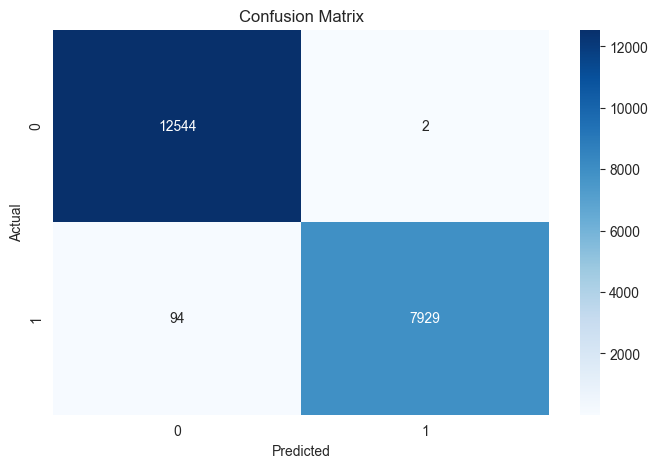

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [368]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     12546
         1.0       1.00      0.99      0.99      8023

    accuracy                           1.00     20569
   macro avg       1.00      0.99      1.00     20569
weighted avg       1.00      1.00      1.00     20569



**Notes:**
- Achieved an impressive accuracy of 99.53%.
- Had only a few misclassifications, with 94 false negatives and 2 false positives. This means it mostly avoids errors but does occasionally fail to identify some cases in the positive class.

#### 2. Naïve Bayes Classifier

In [ ]:
nb = GaussianNB()

nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = nb.predict(X_test)

In [372]:
accuracy_nb = nb.score(X_test, y_test) * 100
print(f"Accuracy: {accuracy_nb:.4f}%")

Accuracy: 98.8186%


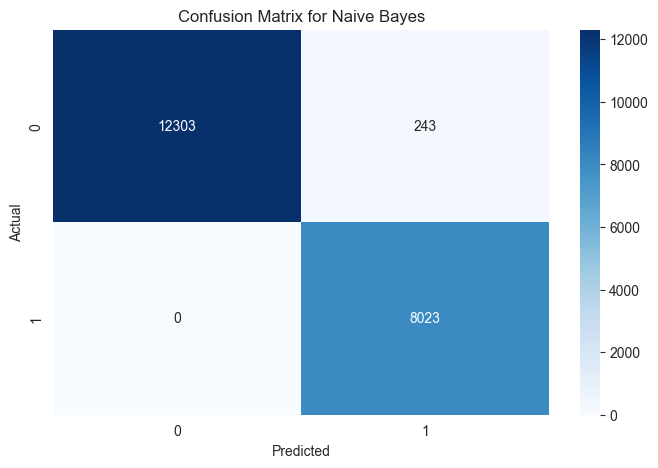

In [ ]:
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_nb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
report_nb = classification_report(y_test, y_pred_nb)
print(report_nb)

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     12546
         1.0       0.97      1.00      0.99      8023

    accuracy                           0.99     20569
   macro avg       0.99      0.99      0.99     20569
weighted avg       0.99      0.99      0.99     20569



**Notes:**
- Slightly lower but still strong with an accuracy of 98.82%.
- Has 0 false negatives but 243 false positives. It’s more aggressive in predicting the positive class, which leads to no missed positive cases but some incorrect positive predictions.

#### General Notes:
- **KNN:** Although KNN also has strong performance with an accuracy of 99.53% and high precision and recall, it has 94 false negatives in predicting cancellations, meaning some cancellations are missed. However, it does have fewer false positives, which might be beneficial if you want to reduce unnecessary cancellations or alerts.

- **Naive Bayes:** With a recall of 1.00 for the cancellation class (class 1), Naive Bayes will capture all cancellations. This high recall makes it particularly useful if missing a cancellation prediction (false negative) is costly, as it doesn't miss any cancellations. However, this comes with more false positives (predicting a cancellation when there isn’t one).